### Apresenta√ß√£o ‚úíÔ∏è

Notebook destinado ao estudo de clusteriza√ß√£o a partir do dataset de vinhos. Diferente do dataset anterior gerado a partir da pr√≥pria biblioteca do scikit-learn, o dataset presente apresenta um particular desavio que se insere na n√£o coes√£o dos datapoints e nem isotropia verificada, o que contribui para a m√° performance do K-Means, dado que o algoritmo apresenta melhor qualidade de performance em casos em que os datapoints apresentam coes√£o e isotropia, concebendo formas regulares. 

Para realizar a clusteriza√ß√£o dos datapoints afins de encontrar os grupos presentes, foi utilizado duas abordagens : sele√ß√£o de features com base na maior varia√ß√£o encontrada e redu√ß√£o de dimensionalidade. A abordagem vencedora foi a segunda, ainda que tanto a m√©trica de silhueta quanto o I. Davis Bouldin estejam pr√≥ximas. 


#### Library üìö

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import DataFrame

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import SilhouetteVisualizer

from factor_analyzer import calculate_bartlett_sphericity

#### Carregando o dataset üíæ

In [8]:
file_path = "wine-clustering.csv"

df_raw = pd.read_csv(file_path)

In [9]:
df_raw.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [10]:
df_raw.shape

(178, 13)

#### Verificando a integridade do dataset üî¨

In [11]:
df_raw.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [12]:
df_raw.duplicated().sum()

np.int64(0)

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [14]:
df_raw.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

Analisando as m√©tricas estat√≠sticas pode-se supor que os dados n√£o apresentam outliers entre si. Para verificar tal aspecto de uma forma mais visual, pode-se adotar o gr√°fico de boxplot. Caso existam datapoints que superam tanto o limite inferior quanto superior, compreende-se que exista a presen√ßa de outliers. 

O tratamento acerca dos outliers depende de cada cen√°rio particular, considerando a import√¢ncia dos outliers presentes, bem como a quantidade de dados existentes no dataset. 

#### An√°lise explorat√≥ria dos dados üîé

In [15]:
# Dicionary for use to fill the argumets in functios builded. 

parameters = {
    "dataset": df_raw,
    "style": "whitegrid", 
    "color": "coolwarm", 
    "height": 12, 
    "width": 6,
    "bins": 35
}

#### Verificando os outliers presentes no dataset a partir do gr√°fico de boxplot. 

In [16]:
def boxplot(
        dataset: DataFrame, 
        style: str, 
        height: int, 
        width: int
    ):
    """
    Generates boxplots for each feature in the dataset. Automatically creates multiple
    figures if the number of features exceeds six.

    Parameters:
    ----------
    dataset : DataFrame
        The dataset to be visualized.
    style : str
        Seaborn theme for plot styling (e.g., 'darkgrid', 'whitegrid').
    height : int
        The height of the figure in inches.
    width : int
        The width of the figure in inches.
    """
    sns.set_theme(style=style)
    
    features = dataset.columns
    num_features = len(features)

    # Maximum number of subplots per figure
    features_per_figure = 6  

    # Ceil division
    num_figures = (num_features + features_per_figure - 1) // features_per_figure  
    
    for fig_idx in range(num_figures):
        # Determine the features for the current figure
        start = fig_idx * features_per_figure
        end = min(start + features_per_figure, num_features)
        current_features = features[start:end]
        
        # Create the figure
        plt.figure(figsize=(width, height))
        
        for i, feature in enumerate(current_features, 1):
            plt.subplot(2, 3, i)
            sns.boxplot(data=dataset[feature])
            plt.title(f"Boxplot de {feature}", rotation = 90)
        
        plt.tight_layout()
        plt.show()


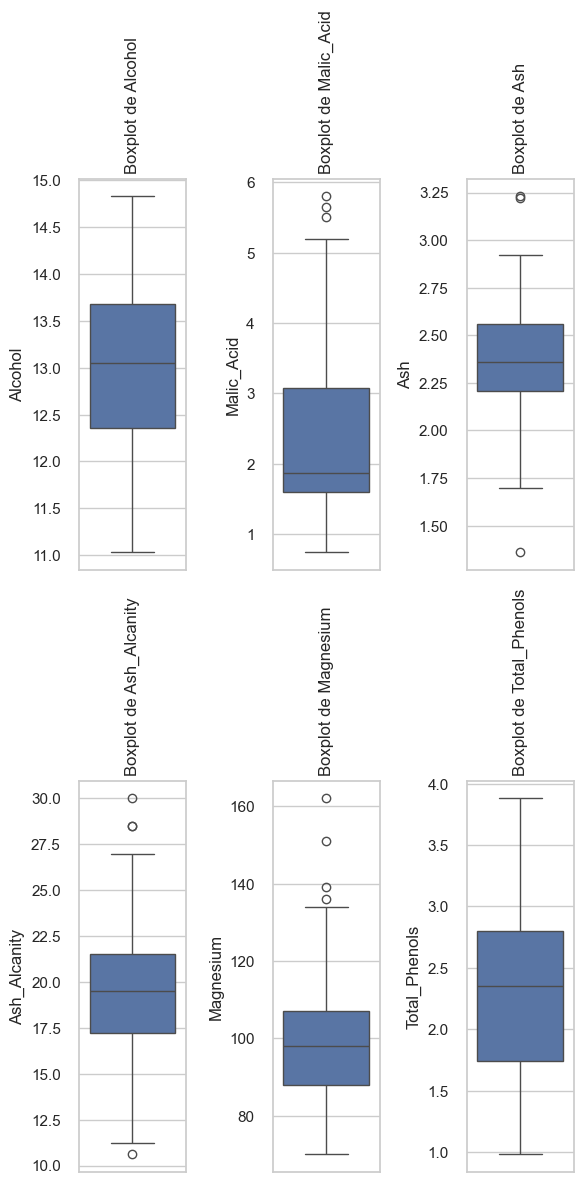

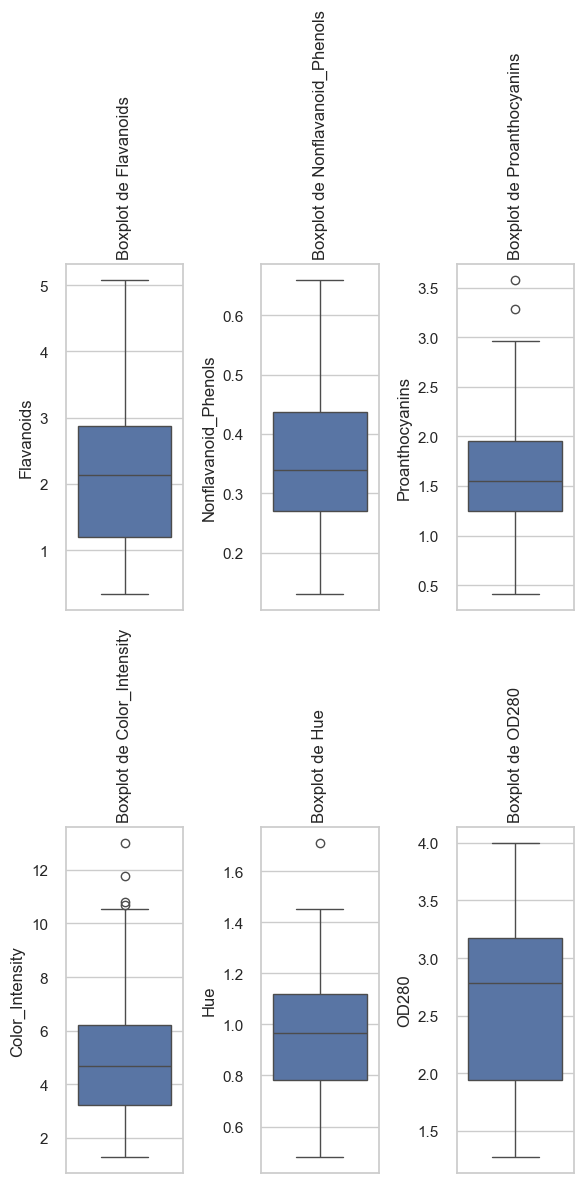

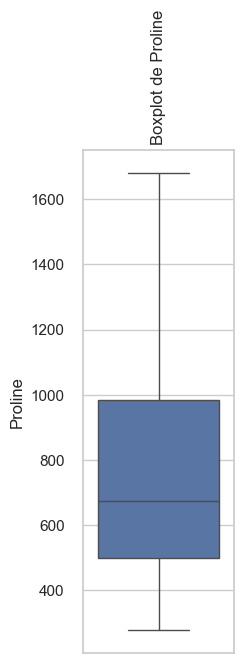

In [17]:
boxplot(
    dataset = df_raw, 
    style   = parameters["style"], 
    height  = parameters["height"], 
    width   = parameters["width"]
)


#### Verificando a distribui√ß√£o dos dados.

In [18]:
def data_distribuition(
        dataset: DataFrame, 
        style : str, 
        height: int, 
        width: int, 
        bins: int
        ):
    """ 
    Visualizes the distribution of each feature in the dataset using histograms.

    Parameters:
    ----------
    dataset : DataFrame
        The dataset to be visualized, where each column represents a feature.
    
    style : str
        Seaborn theme for plot styling (e.g., 'darkgrid', 'whitegrid').
    
    height : int
        The height of the figure in inches.
    
    width : int
        The width of the figure in inches.
    
    bins : int
        Number of bins for the histograms.
    """
    feature = dataset.columns
    sns.set_theme(style=style)

    n_cols = 3 
    n_rows = (len(feature) + n_cols - 1) // n_cols  

    plt.figure(figsize=(height, width))

    for i, feature in enumerate(feature, 1):

        data = dataset[feature]

        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data, kde=True, bins=bins)
        plt.title(f"Histograma de {feature}")


    plt.tight_layout()
    plt.show()

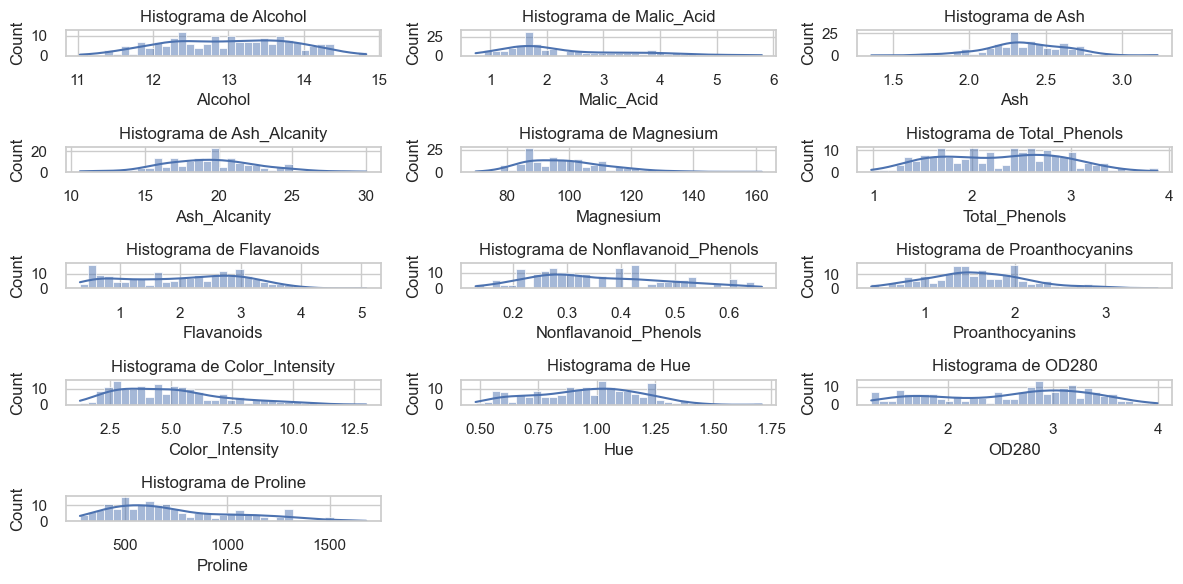

In [19]:
data_distribuition(
    dataset = df_raw, 
    style   = parameters["style"], 
    height  = parameters["height"], 
    width   = parameters["width"], 
    bins    = parameters["bins"]
)

Nota-se que a distribui√ß√£o dos dados tendem a seguir uma curva normal, quando n√£o apresentam uma cauda √† direita, revelando a assimetria existente que no gr√°fico de boxplot tamb√©m √© captada em termos dos outliers existentes. A estrat√©gia utilizada para ajustar a distribui√ß√£o e diminuir a quantidade de outliers ser√° a normaliza√ß√£o, seguindo a dire√ß√£o necess√°ria para o uso de modelos de clusteriza√ß√£o que necessitam - para seu melhor comportamento - que os dados estejam escalonados ou sujeitos a um intervalo especifico. 

#### Verificando se os dados apresentam correla√ß√£o linear. 

In [20]:
def pearson_matrix(
        dataset: DataFrame, 
        color: str, 
        height: int, 
        width: int
    ):
    """ 
    Generates a heatmap to visualize the Pearson correlation matrix of a dataset.

    Parameters:
    ----------
    dataset : DataFrame
        The dataset whose features' correlations will be computed and visualized.
    
    color : str
        The colormap for the heatmap (e.g., 'coolwarm', 'viridis').
    
    height : int
        The height of the heatmap figure in inches.
    
    width : int
        The width of the heatmap figure in inches.
    """
    corr_matrix = dataset.corr()

    plt.figure(figsize=(height, width))
    sns.heatmap(corr_matrix, annot=True, cmap=color, fmt=".2f")

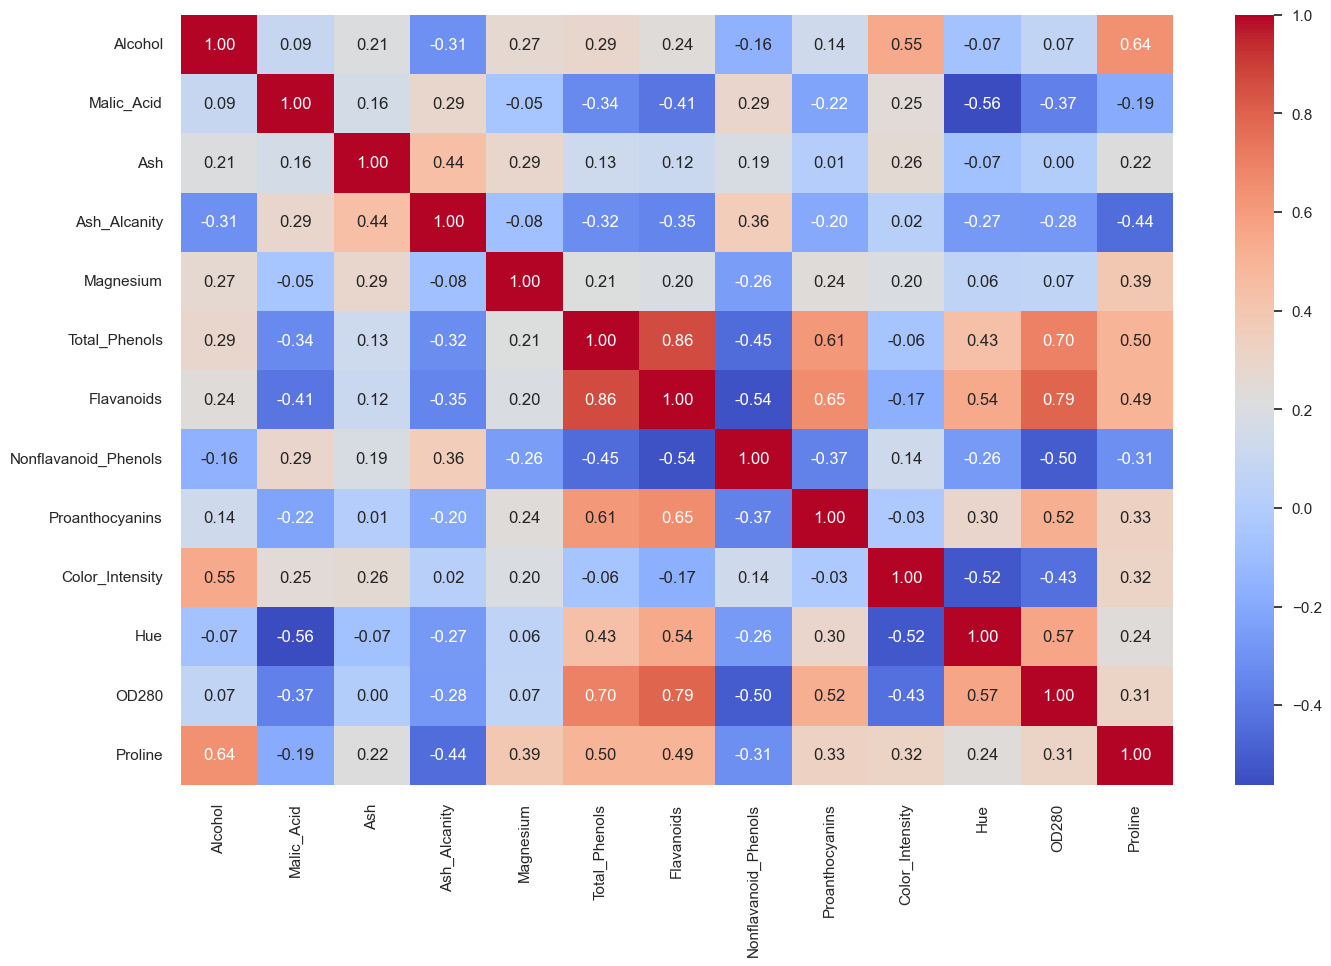

In [21]:
pearson_matrix(
    dataset = df_raw, 
    color   = parameters["color"], 
    height  = 16, 
    width   = 10
)

#### Verificando se o dataset pode ser passado para um PCA 

O PCA √© uma t√©cnica de redu√ß√£o de dimensionalidade, que forma novas features com base nas j√° pr√©-existentes, integrando aquelas que apresentam correla√ß√£o entre si. Tal m√©todo estat√≠stico busca reduzir a quantidade de features existentes em um dataset, mas sem perder significativamente o teor explicativo delas, mantendo as features que consigam compreender a maior vari√¢ncia dos dados. 

Antes de ser aplicado o PCA no dataset, pode ser interessante verificar se ele √© propr√≠cio para a aplica√ß√£o da t√©cnica. Uma das formas de verificar isso se d√° por meio do c√°lculo da esfericidade de Barlett, que compreende em termos de signific√¢ncia estat√≠stica se o dataset presente se difere de uma matriz identididade. Caso n√£o seja diferente, compreende-se que os dados do dataset n√£o apresentam rela√ß√µes lineares entre si, invalidando o uso do PCA. 

Em termos de interpretabilidade, tem-se que caso o valor-p, a um intervalo de confian√ßa de 95%, seja inferior que 5%, os dados apresentam rela√ß√µes lineares entre si. Caso contr√°rio, n√£o. 

In [22]:
_, valor_p = calculate_bartlett_sphericity(df_raw)

if valor_p < 0.05:
    print(f"O dataset pode ser submetido ao PCA.\nValor-p: {valor_p}")
else:
    print("O dataset n√£o pode ser submetido ao PCA, pois o seu valor-p √© superior que 5%. ")

O dataset pode ser submetido ao PCA.
Valor-p: 2.4686170324251343e-224


#### Scaler



In [23]:
# Scaling the values with standard scaler. 

scaler = StandardScaler()

normalized_values = scaler.fit_transform(df_raw.values)

normalized_values[:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

In [24]:
# Rebuilding the dataframe with normalized values. 

df = pd.DataFrame(
    normalized_values, 
    columns = df_raw.columns, 
    index   = df_raw.index
)

df.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.965242  
2  0.318304  0.788587  1.395148  
3 -0.427544  1.184071  2.334574  
4  0.362177  0.449601 -0.037874

#### PCA

In [25]:
pca = PCA(n_components=0.8, random_state=20)

df_pca = pd.DataFrame(pca.fit_transform(df))

In [26]:
df_pca.head()

0         1         2         3         4
0  3.316751  1.443463 -0.165739 -0.215631  0.693043
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655
2  2.516740  1.031151  0.982819  0.724902 -0.251033
3  3.757066  2.756372 -0.176192  0.567983 -0.311842
4  1.008908  0.869831  2.026688 -0.409766  0.298458

In [27]:
# Explained variance ratio. 

pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

In [28]:
# Sum of each component about explained variance ratio. 

pca.explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293])

In [29]:
# Percentage of each feature explained.

pca.explained_variance_ratio_*5

array([1.8099424 , 0.96037451, 0.55618153, 0.35345151, 0.32816468])

In [30]:
# Checking the importance of each of the previous dataset for training 
# of main components. This resource is used to understand
# what each component represents.

pd.DataFrame(pca.components_, columns=df.columns, index=[f"Autovetor {i + 1}" for i in range(5)])

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Autovetor 1  0.144329   -0.245188 -0.002051     -0.239320   0.141992   
Autovetor 2  0.483652    0.224931  0.316069     -0.010591   0.299634   
Autovetor 3 -0.207383    0.089013  0.626224      0.612080   0.130757   
Autovetor 4 -0.017856    0.536890 -0.214176      0.060859  -0.351797   
Autovetor 5 -0.265664    0.035214 -0.143025      0.066103   0.727049   

             Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Autovetor 1       0.394661    0.422934             -0.298533         0.313429   
Autovetor 2       0.065040   -0.003360              0.028779         0.039302   
Autovetor 3       0.146179    0.150682              0.170368         0.149454   
Autovetor 4       0.198068    0.152295             -0.203301         0.399057   
Autovetor 5      -0.149318   -0.109026             -0.500703         0.136860   

             Color_Intensity       Hue     OD280   Proline  
Autovetor 1        -0.088617  0.296715  0.376167  0.286752  
Autovetor 2         0.529996 -0.279235 -0.164496  0.364903  
Autovetor 3        -0.137306  0.085222  0.166005 -0.126746  
Autovetor 4         0.065926 -0.427771  0.184121 -0.232071  
Autovetor 5        -0.076437 -0.173615 -0.101161 -0.157869

#### K-Means

In [31]:
def elbow_graph(data):

    wc_sum = []

    for i in range(1, 11): 
        kmeans = KMeans(
            n_clusters   = i, 
            init         = "k-means++", 
            max_iter     = 300, 
            n_init       = 10, 
            random_state = 20
        )
        kmeans.fit(data)
        wc_sum.append(kmeans.inertia_)

    plt.plot(range(1, 11), wc_sum)
    plt.title("Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("Within Clusters Sum")
    plt.show()

#### Sem redu√ß√£o de dimensionalidade pelo PCA.

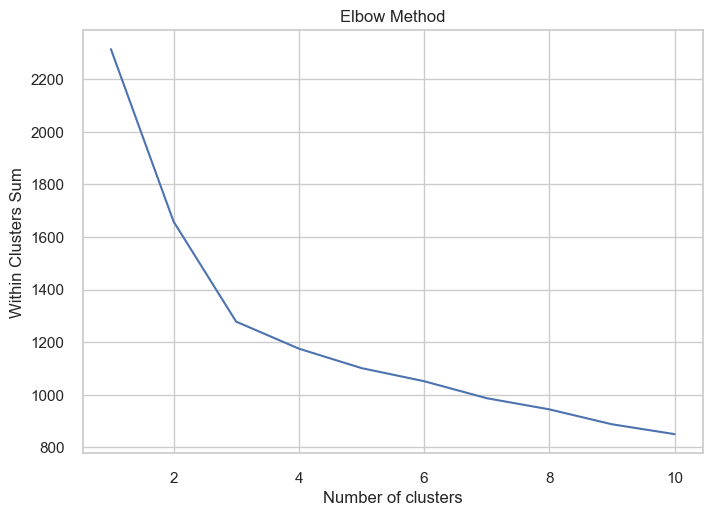

CPU times: total: 328 ms
Wall time: 920 ms


In [32]:
%%time
elbow_graph(
    normalized_values
)

In [33]:
model = KMeans(
    n_clusters   = 5, 
    init         = "k-means++", 
    max_iter     = 300, 
    n_init       = 10, 
    random_state = 20
)

In [34]:
labels = model.fit_predict(normalized_values)   

In [35]:
centroid = model.cluster_centers_

In [36]:
max = len(centroid[0])
for i in range(max):
    print(df.columns.values[i],"\n{:.4f}\n".format(centroid[:, i].var()))

Alcohol 
0.5645

Malic_Acid 
0.3620

Ash 
0.4766

Ash_Alcanity 
0.3609

Magnesium 
0.2031

Total_Phenols 
0.5214

Flavanoids 
0.6043

Nonflavanoid_Phenols 
0.4582

Proanthocyanins 
0.3926

Color_Intensity 
0.5453

Hue 
0.4537

OD280 
0.5778

Proline 
0.5622



Verificando as features que apresentam maior varia√ß√£o dos dados. Tal an√°lise se relaciona a uma abordagem de sele√ß√£o das features que ser√£o mantidas para a clusteriza√ß√£o do dataset, de modo que as que permanecem s√£o aquelas que apresentam maior varia√ß√£o dos dados em detrimento das demais. Essa perspectiva se circunscreve na suposi√ß√£o de que a varia√ß√£o dos dados pode ser entendida em termos de maior contribui√ß√£o para a clusteriza√ß√£o dos clusters presentes. 


In [37]:
# Selecting the features that presented the greatest variation in the data, 
# from the threshold of 0.5

df_2 = df[["Alcohol", "Total_Phenols", "Flavanoids", "Color_Intensity", "Hue", "OD280"]]

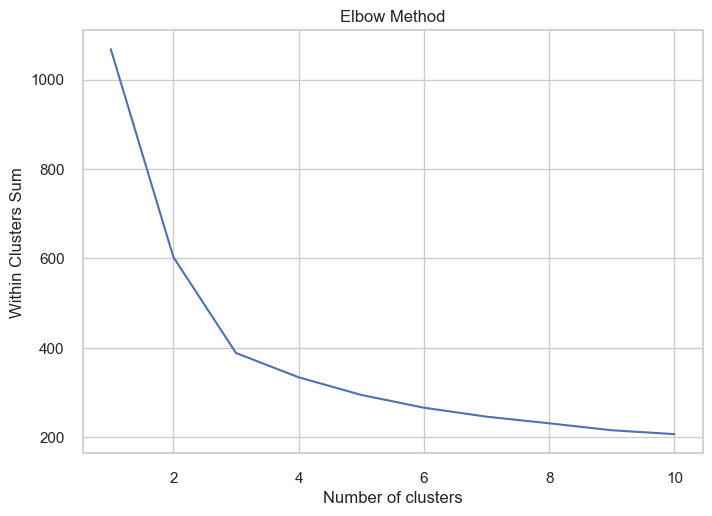

In [38]:
elbow_graph(
    df_2
)

In [39]:
model_2 = KMeans(
    n_clusters   = 3, 
    init         = "k-means++", 
    max_iter     = 300, 
    n_init       = 10, 
    random_state = 20
)

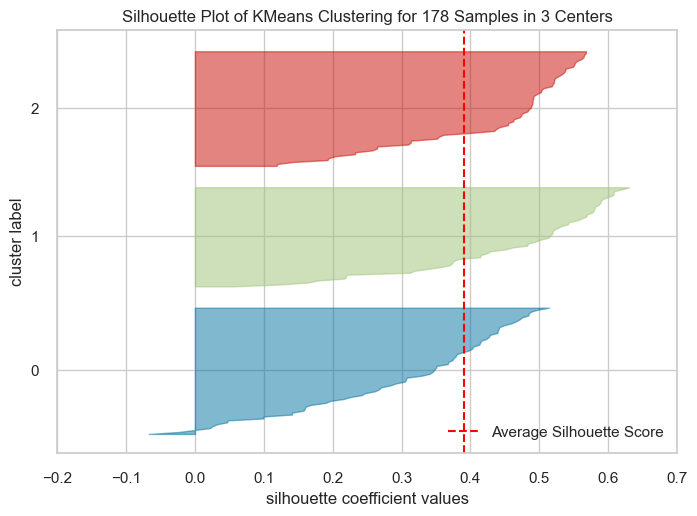

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# Buiding silhoutte graph for view the cluster's quality. 

silhoutte_view = SilhouetteVisualizer(model_2, colors="yellowbrick")
silhoutte_view.fit(df_2)
silhoutte_view.show()

In [41]:
# Verify the quality of clusters builded with silhoutte score. 

silhoutte = metrics.silhouette_score(
    df_2, 
    model_2.labels_, 
    metric="euclidean"
)

print(f"A silhueta do modelo √© de aproximadamente {silhoutte.round(3)}")

A silhueta do modelo √© de aproximadamente 0.391


In [42]:
# Verify the quality of clusters builded with Davis Bouldin.

davis_bouldin = metrics.davies_bouldin_score(
    df_2, 
    model_2.labels_
) 

print(f"√çndice Davis Bouldin do modelo : {davis_bouldin.round(3)}")

√çndice Davis Bouldin do modelo : 0.974


In [43]:
print(f"X dtype: {normalized_values.dtype}\ny dtype: {labels.dtype}")

X dtype: float64
y dtype: int32


In [44]:
X_array = np.array(df_2.values)
y_array = np.array(model_2.fit_predict(df_2))

In [45]:
def visualize_cluster(X: float, y: int, size : int):
    """
    Function that build a cluster graph for cluster's visualization 
    """
    # Noting the labels for each points
    unique_labels = set(y)

    # Building the graph with the labels. 
    for label in unique_labels:
        plt.scatter(X[y==label][:, 0], X[y==label][:, 1], s = size, label = f"Cluster {label}")

    plt.legend(loc="upper right")

    plt.show()

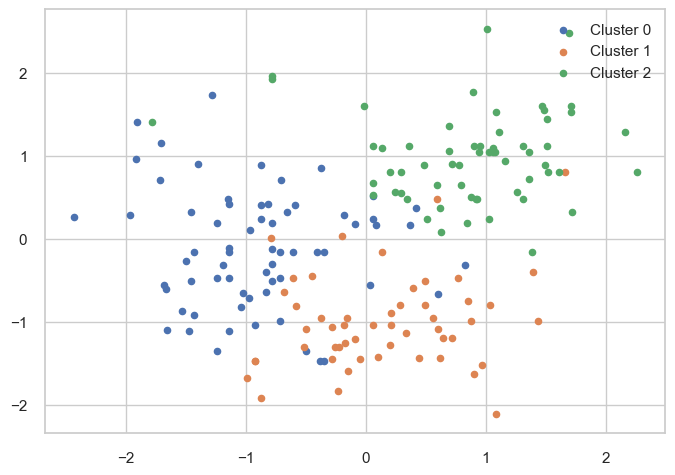

In [46]:
visualize_cluster(
    X    = X_array, 
    y    = y_array, 
    size = 20
)

#### Com redu√ß√£o de dimensionalidade pelo PCA

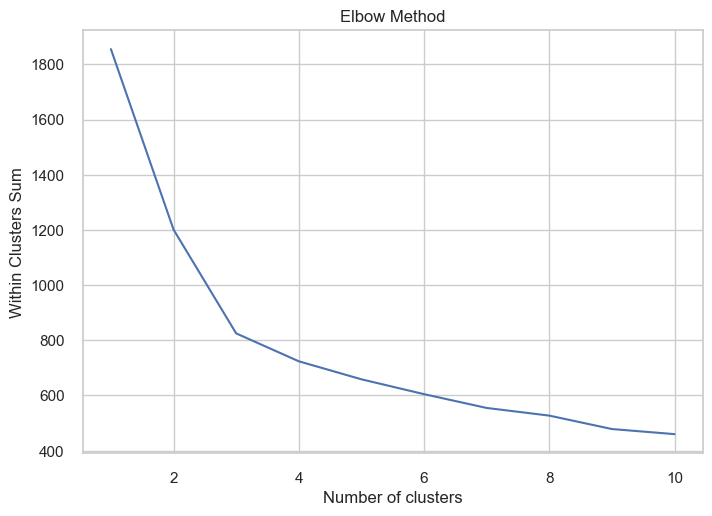

CPU times: total: 438 ms
Wall time: 603 ms


In [47]:
%%time
elbow_graph(
    df_pca.values
)

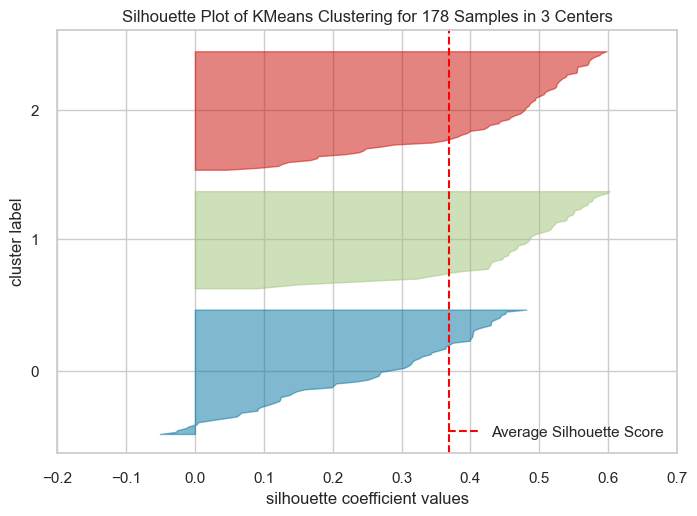

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
# Creating the K-Means model with number cluster found
# using Elbow method.

model = KMeans(
    n_clusters   = 3, 
    init         = "k-means++", 
    max_iter     = 300,
    n_init       = 10, 
    random_state = 20
)


# Buiding silhoutte graph for view the cluster's quality. 

silhoutte_view = SilhouetteVisualizer(model, colors="yellowbrick")
silhoutte_view.fit(df_pca.values)
silhoutte_view.show()

In [55]:
# Verify the quality of clusters builded with silhoutte score. 

silhoutte = metrics.silhouette_score(
    df_pca.values, 
    model.labels_, 
    metric="euclidean"
)

print(f"A silhueta do modelo √© de aproximadamente: {silhoutte.round(3)}")

A silhueta do modelo √© de aproximadamente: 0.369


In [56]:
# Verify the quality of clusters builded with Davis Bouldin.

davis_bouldin = metrics.davies_bouldin_score(
    df_pca.values, 
    model.labels_
) 

print(f"√çndice Davis Bouldin do modelo : {davis_bouldin.round(3)}")

√çndice Davis Bouldin do modelo : 1.093


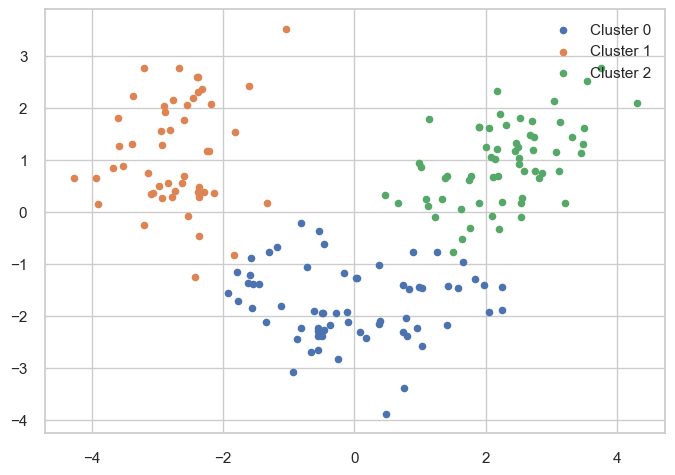

In [57]:
visualize_cluster(
    X    = np.array(df_pca.values), 
    y    = np.array(model.labels_), 
    size = 20
)